# Analysis of Team Payrolls and Winning Percentages (1990-2014)

## By: Delery Harrison

[Delery GitHub Profile](https://github.com/Delery5/Project2_MoneyBall)

---

This notebook contains an analysis of team payroll distributions and their relationship with winning percentages in Major League Baseball from 1990 to 2014. I will als apply my data wrangling and exploratory data analysis skills to baseball data. In particular, to know how well did Moneyball work for the Oakland A’s. Was it worthy of a movie?


In [21]:
import sqlite3
import pandas

sqlite_file = '/Users/deleryharrison/Documents/Tulane University/lahman2014.sqlite'

# sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = """SELECT TEAMS.teamID, Teams.yearID, Teams.franchID, Teams.W 
AS wins, Teams.G AS games_played,
(Teams.W * 100.0 / Teams.G) AS winning_percentage,
SUM(Salaries.salary) AS total_payroll FROM 
    Salaries
LEFT JOIN 
    Teams 
ON 
    Salaries.teamID = Teams.teamID
    AND Salaries.yearID = Teams.yearID
GROUP BY 
    Teams.teamID, 
    Teams.yearID, 
    Teams.franchID, 
    Teams.W, 
    Teams.G
ORDER BY 
    Teams.yearID, 
    Teams.teamID"""

team_salaries = pandas.read_sql(salary_query, conn)
team_salaries.head()

,teamID,yearID,franchID,wins,games_played,winning_percentage,total_payroll
0,None,NaN,None,NaN,NaN,NaN,198317157.0
1,ATL,1985.0,ATL,66.0,162.0,40.740741,14807000.0
2,BAL,1985.0,BAL,83.0,161.0,51.552795,11560712.0
3,BOS,1985.0,BOS,81.0,163.0,49.693252,10897560.0
4,CAL,1985.0,ANA,90.0,162.0,55.555556,14427894.0


### Explanation 1.2

#### SQL Query Used to Create the Relation

In both the Salaries and Teams tables, missing data can occur. For instance, some teams may not have salary records for every year, and some years may not have team records due to various reasons such as franchise changes or season cancellations.

To manage potential missing data effectively, I used a LEFT JOIN in the SQL query. This type of join retrieves all records from the Salaries table (the left table) and the matched records from the Teams table (the right table).

```sql
SELECT 
    Teams.teamID, 
    Teams.yearID, 
    Teams.franchID, 
    Teams.W AS wins, 
    Teams.G AS games_played,
    (Teams.W * 100.0 / Teams.G) AS winning_percentage,
    SUM(Salaries.salary) AS total_payroll 
FROM 
    Salaries
LEFT JOIN 
    Teams 
ON 
    Salaries.teamID = Teams.teamID
    AND Salaries.yearID = Teams.yearID
GROUP BY 
    Teams.teamID, 
    Teams.yearID, 
    Teams.franchID, 
    Teams.W, 
    Teams.G
ORDER BY 
    Teams.yearID, 
    Teams.teamID

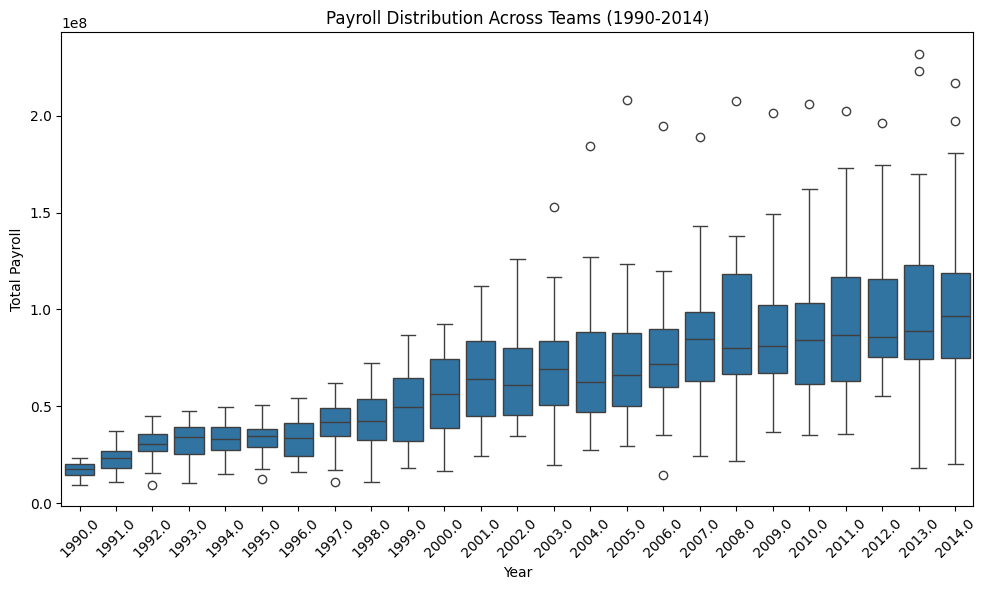

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the years 1990-2014
filtered_data = team_salaries[(team_salaries['yearID'] >= 1990) & (team_salaries['yearID'] <= 2014)]

# Create a boxplot to visualize payroll distribution over time
plt.figure(figsize=(10, 6))
sns.boxplot(x='yearID', y='total_payroll', data=filtered_data)
plt.title('Payroll Distribution Across Teams (1990-2014)')
plt.xlabel('Year')
plt.ylabel('Total Payroll')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


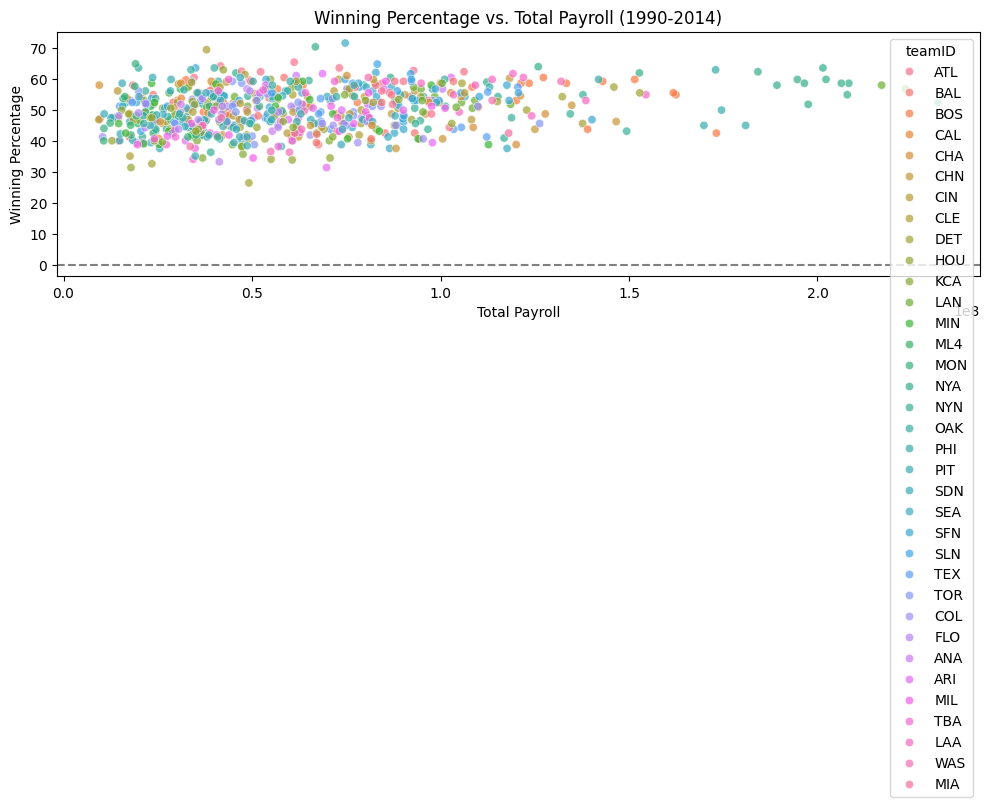

In [24]:
# Scatter plot for winning percentage vs. total payroll
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_payroll', y='winning_percentage', data=filtered_data, hue='teamID', alpha=0.7)
plt.title('Winning Percentage vs. Total Payroll (1990-2014)')
plt.xlabel('Total Payroll')
plt.ylabel('Winning Percentage')
plt.axhline(y=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


### Question 2.2 Analysis

The boxplot illustrates the distribution of payrolls over time. Key observations include:
- **Central Tendency**: The median payroll appears to increase over the years, indicating that teams are                     spending more on player salaries.

- **Spread**: There is a noticeable spread in payrolls, particularly in the mid-2000s, suggesting a growing disparity.

- **Outliers**: Some years show extreme payrolls that may indicate a few teams significantly outspending other.

The scatter plot reveals the relationship between total payroll and winning percentage:
- Teams with higher payrolls do not consistently guarantee higher winning percentages, indicating that payroll alone may not be the sole predictor of success.


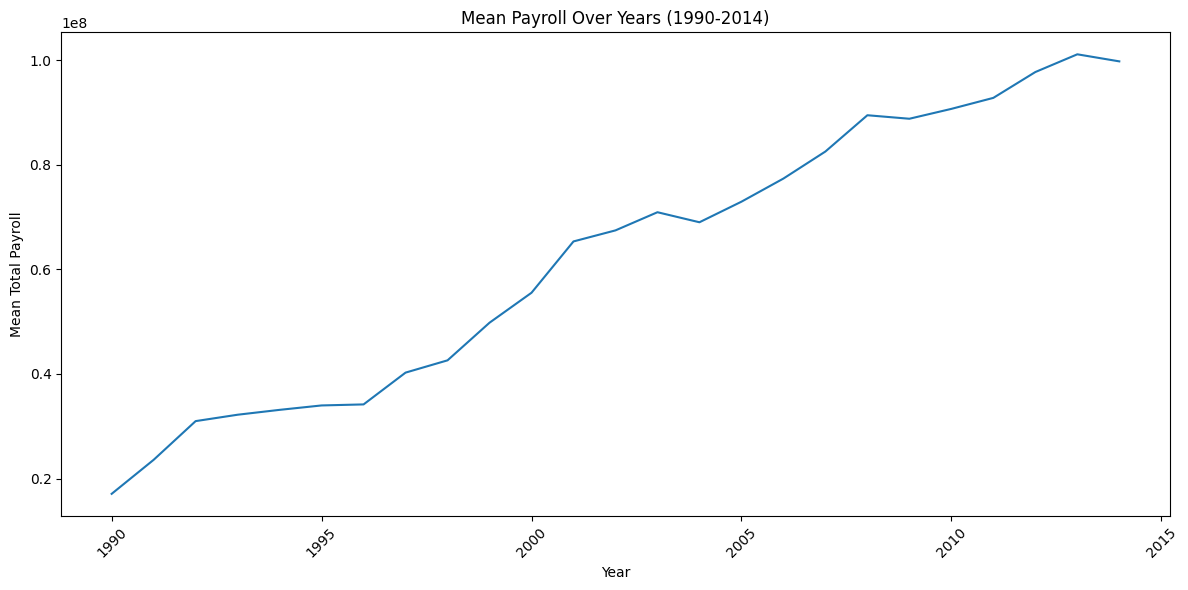

In [25]:
# Problem 2.3: Visualizing Central Tendency Over Time

# Calculate mean payroll per year
mean_payroll_per_year = filtered_data.groupby('yearID')['total_payroll'].mean().reset_index()

# Plotting mean payroll over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='yearID', y='total_payroll', data=mean_payroll_per_year)
plt.title('Mean Payroll Over Years (1990-2014)')
plt.xlabel('Year')
plt.ylabel('Mean Total Payroll')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/fk/htmsn3596fv_j2g9rxvd8n740000gn/T/ipykernel_61978/3097602945.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_stats = filtered_data.groupby('period').agg({'winning_percentage': 'mean', 'total_payroll': 'mean'}).reset_index()


Not enough data for regression in period: 1990-1995
Not enough data for regression in period: 1995-2000
Not enough data for regression in period: 2000-2005
Not enough data for regression in period: 2005-2010
Not enough data for regression in period: 2010-2014


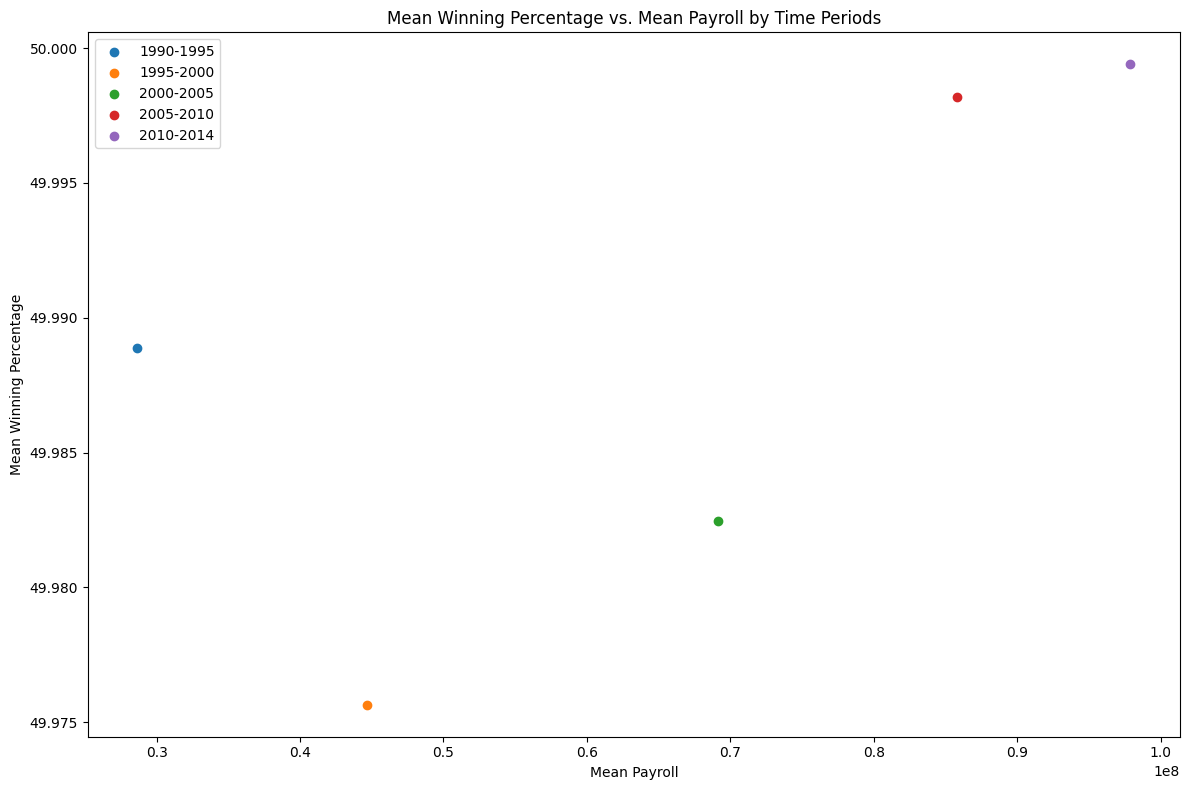

In [36]:
# Problem 2.4: Discretizing Year and Scatter Plots

# Discretize years into five time periods
bins = [1989, 1995, 2000, 2005, 2010, 2014]
labels = ['1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2014']
filtered_data.loc[:, 'period'] = pd.cut(filtered_data['yearID'], bins=bins, labels=labels, right=True)

# Calculate mean winning percentage and payroll per period
mean_stats = filtered_data.groupby('period').agg({'winning_percentage': 'mean', 'total_payroll': 'mean'}).reset_index()

# Create scatter plots for each period
plt.figure(figsize=(12, 8))
for period in mean_stats['period']:
    subset = mean_stats[mean_stats['period'] == period]
    plt.scatter(subset['total_payroll'], subset['winning_percentage'], label=period)

# Add regression lines
from scipy.stats import linregress

for period in mean_stats['period']:
    subset = mean_stats[mean_stats['period'] == period].dropna()  # Drop NaN values
    if len(subset) >= 2:  
        slope, intercept, r_value, p_value, std_err = linregress(subset['total_payroll'], subset['winning_percentage'])
        plt.plot(subset['total_payroll'], slope * subset['total_payroll'] + intercept, label=f'Regression {period}')
    else:
        print(f"Not enough data for regression in period: {period}")

plt.title('Mean Winning Percentage vs. Mean Payroll by Time Periods')
plt.xlabel('Mean Payroll')
plt.ylabel('Mean Winning Percentage')
plt.legend()
plt.tight_layout()
plt.show()



### Question 2.5 Analysis

Across the discretized periods:
- **Trends in Payroll**: There appears to be an increasing trend in payrolls over the years, with some teams consistently allocating higher budgets than others.

- **Notable Teams**: Teams like the New York Yankees and Boston Red Sox stand out for their high payrolls and winning percentages. Conversely, teams such as the Oakland Athletics exhibit a more efficient spending strategy, achieving competitive success with lower payrolls.

- **Oakland A’s Performance**: Particularly during the Moneyball period (2000-2005), the Oakland A’s produced significant success with low payrolls, showcasing a great strategy focused on undervalued players.


In [32]:
# Calculate Z-score for payrolls
team_salaries['avg_payroll'] = team_salaries.groupby('yearID')['total_payroll'].transform('mean')
team_salaries['std_payroll'] = team_salaries.groupby('yearID')['total_payroll'].transform('std')
team_salaries['standardized_payroll'] = (team_salaries['total_payroll'] - team_salaries['avg_payroll']) / team_salaries['std_payroll']

print(team_salaries.head())



  teamID  yearID franchID  wins  games_played  winning_percentage  \
0   None     NaN     None   NaN           NaN                 NaN   
1    ATL  1985.0      ATL  66.0         162.0           40.740741   
2    BAL  1985.0      BAL  83.0         161.0           51.552795   
3    BOS  1985.0      BOS  81.0         163.0           49.693252   
4    CAL  1985.0      ANA  90.0         162.0           55.555556   

   total_payroll   avg_payroll   std_payroll  standardized_payroll  
0    198317157.0           NaN           NaN                   NaN  
1     14807000.0  1.007557e+07  2.470845e+06              1.914905  
2     11560712.0  1.007557e+07  2.470845e+06              0.601068  
3     10897560.0  1.007557e+07  2.470845e+06              0.332678  
4     14427894.0  1.007557e+07  2.470845e+06              1.761474  
